# ***Intermediate-earth-data-science-textbook***
---
## **Lesson 1. Work With Datetime Format in Python - Time Series Data**
1. This module objective is to learn how to handle `datetime` fields using pandas to work with time series for plotting data in Python
2. How to work with no data values in Python

### **Why Use Datetime Objects in Python**

#### **Import Packages and Get Data** 

In [8]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from glob import glob
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel("ERROR")
import warnings

warnings.filterwarnings("ignore")

# Adjust font size and style for all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

#### ***Set Working Directory***

In [3]:
# Download the data
data = et.data.get_data("colorado-flood")

# Set Working Directory
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [17]:
glob(os.path.join(os.getcwd(), "colorado-flood/precipitation", "*"))

['C:\\Users\\Gabriel\\earth-analytics\\data\\colorado-flood/precipitation\\805325-precip-daily-2003-2013.csv',
 'C:\\Users\\Gabriel\\earth-analytics\\data\\colorado-flood/precipitation\\805325-precip-dailysum-2003-2013.csv',
 'C:\\Users\\Gabriel\\earth-analytics\\data\\colorado-flood/precipitation\\805333-precip-daily-1948-2013.csv',
 'C:\\Users\\Gabriel\\earth-analytics\\data\\colorado-flood/precipitation\\precip-boulder-aug-oct-2013.csv',
 'C:\\Users\\Gabriel\\earth-analytics\\data\\colorado-flood/precipitation\\PRECIP_HLY_documentation.pdf']

#### Open the precipitation data for Boulder Colorado
- Look at the strucuture of the data


In [19]:
# Define relative path to the data
fp = os.path.join(
    "colorado-flood", "precipitation", "805325-precip-daily-2003-2013.csv"
)

# Import thfiles as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(fp)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


#### Plot the data using the `DAILY_PRECIP` column and see what you notice

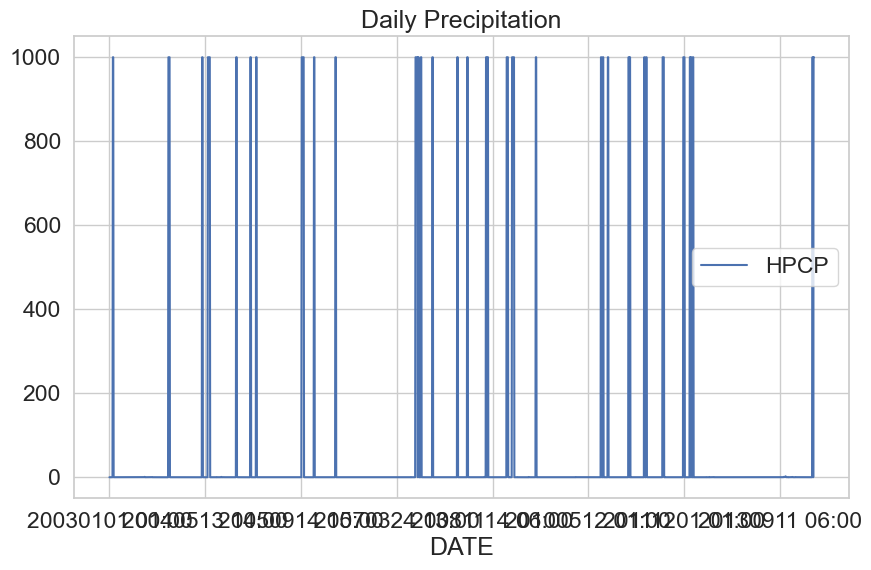

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

boulder_precip_2003_2013.plot(x="DATE", y="HPCP", title="Daily Precipitation", ax=ax)

fig.show()

- The line graph of daily precipitation has N/A value of 999.9 that has not been removed, so the graph looks like vertical lines where those values are

# Challenge 1: Review MetaData
1. Do he data have a no data value?
2. How are missing data identified in the table
3. How Frequently are the data recorded?
4. What are the units of the data.

#### ***Time Series CLeaning & Exploration***

In [24]:
boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [25]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [27]:
# Import data using datetime and no data value properly
boulder_precip_2003_2013 = pd.read_csv(
    fp,
    # Make sure the dates import in datetimeformat
    parse_dates=["DATE"],
    # Set Date as index column so you can subset data by time period
    index_col=["DATE"],
    # Mask no data values so they are not ploted / used in analysis
    na_values=["999.99"],
)

# View of the data
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [30]:
# View summary statistics == DATE column is not included anymore
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


#### Using An Index In Pandas


In [32]:
# Where is the date column?
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

- You can access the DATE column as an index using `.index`: `data-frame-name.index`

In [33]:
# View the index for your dataframe
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

- You can reset the index if you want to turn it back into normal column using `df.reset_index()`

In [34]:
boulder_precip_2003_2013.reset_index()

,DATE,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
0,2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
1,2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2,2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
3,2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
4,2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...,...
1835,2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
1836,2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
1837,2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,
1838,2013-12-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,


#### ***Plot the Cleaned data again to see how it looks***

Text(0, 0.5, 'Precipitation (inches)')

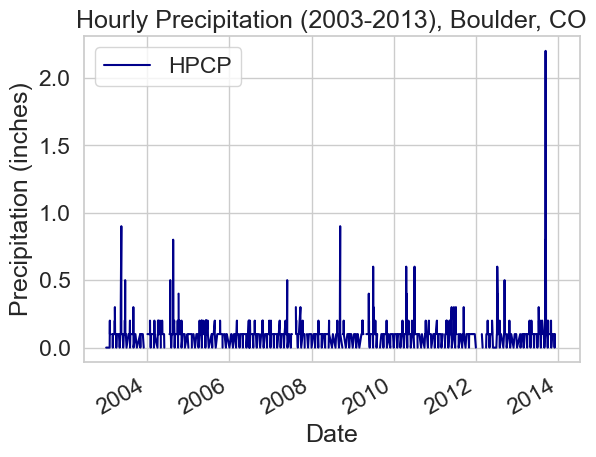

In [37]:
# Plot the time series again
fig, ax = plt.subplots()
boulder_precip_2003_2013.plot(
    y="HPCP",
    ax=ax,
    title="Hourly Precipitation (2003-2013), Boulder, CO",
    color="darkblue",
)
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation (inches)")

#### **Subset Time Series Data by Time**


In [44]:
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

In [51]:
# Subset data from 2005
precip_2005 = boulder_precip_2003_2013.loc["2005"]
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


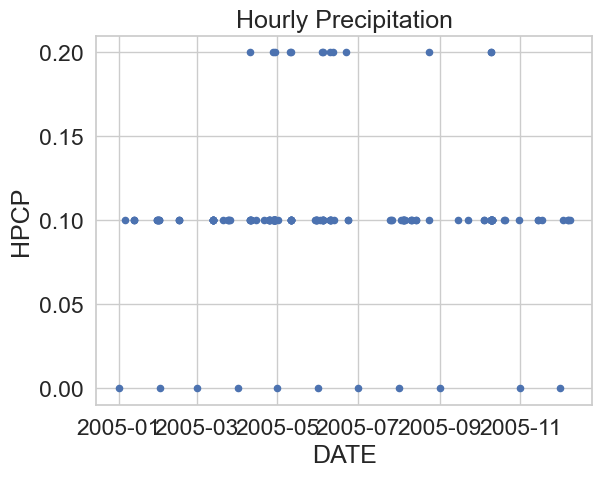

In [52]:
# Remove missing data values
precip_2005_clean = precip_2005.dropna()

# Plot the data using pandas
precip_2005_clean.reset_index().plot(
    x="DATE", y="HPCP", title="Hourly Precipitation", kind="scatter"
)

plt.show()

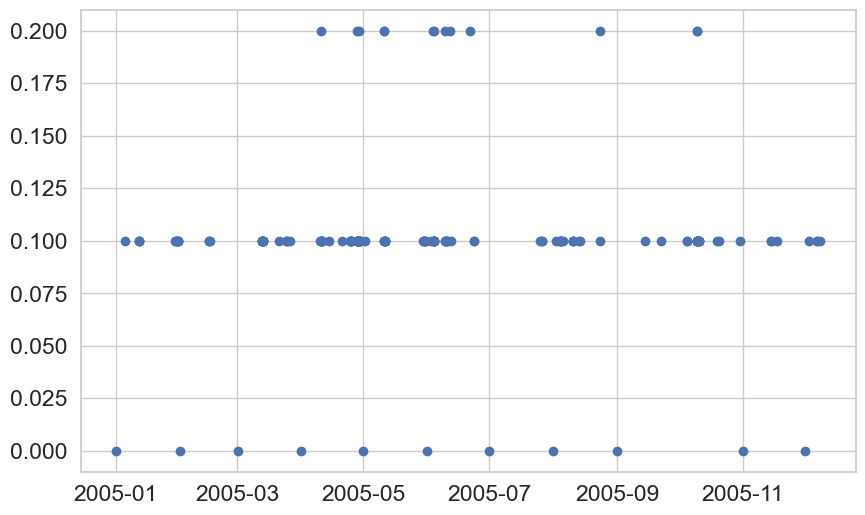

In [53]:
# Plot the data with matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=precip_2005_clean.index.values, y=precip_2005_clean["HPCP"])
fig.show()

#### **Resample Time Series Data**
- Refers to summarize data over different time scale
- For example, hourly data to daily data
- Pandas method: `pd.resample()` you set the frequency you want to resample
- *day ('D') week ('W')*
- You need to tell Python how you wish to summarize the data for that time period. You want the mean or add up the values for that period? Do you want the max value?


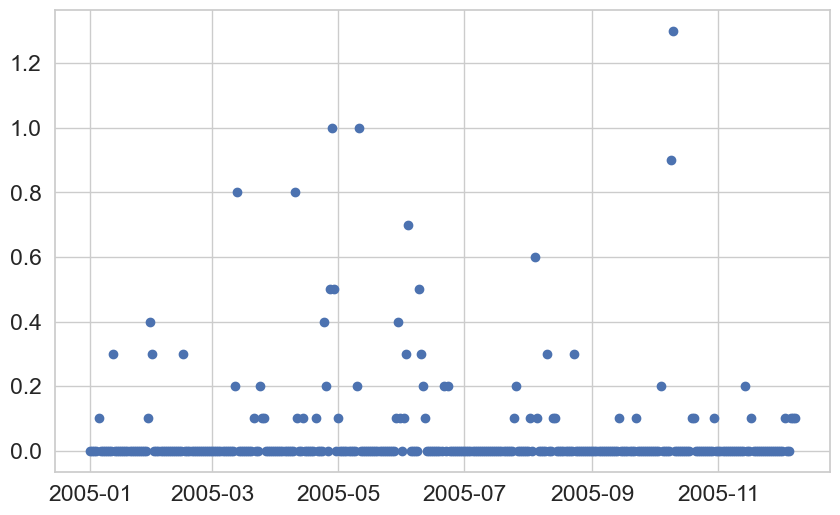

In [56]:
# Resample precipitation data adding the hourly data
daily_precip = precip_2005_clean.resample("D").sum()

# Plot the data:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(daily_precip.index.values, daily_precip["HPCP"])
fig.show()

## ***Challenge 2: Plot Multiple Axes***
If you recall from previous lessons, you can create a figure with multiple subplots using:

**`f, (ax1, ax2) = plot.subplots(2,1)`**

**In the cell below, do the following:**

- Create a variable that contains precipitation data from 2012 and a second variable that contains data from 2013.
- Plot each variable on a subplot within a matplotlib figure. The 2012 data should be on the top of your figure and the 2013 data should be on the bottom.

**Then answer the following questions:**

1. In which year 2012 or 2013 do you see the highest hourly precipitation value(s)?
2. What is the max hourly precipitation value for each year? HINT: data-frame.max() should help you answer this question.

*Customize your plots with x and y axis labels and titles.*

In [62]:
# Subset the data
precip_2012 = boulder_precip_2003_2013.loc["2012"]
precip_2013 = boulder_precip_2003_2013.loc["2013"]

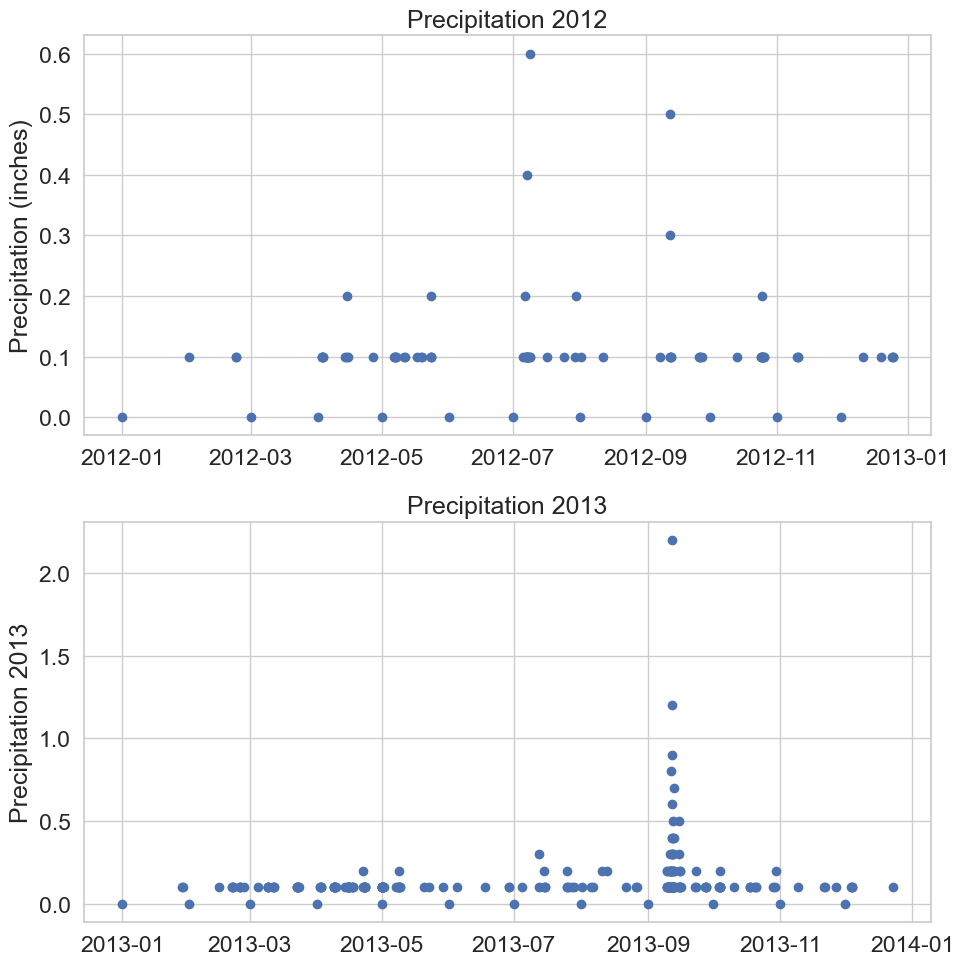

In [66]:
# Plot the scatter for 2012 and 2013 Data
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
ax[0].scatter(x=precip_2012.index.values, y=precip_2012["HPCP"])
ax[0].set(title="Precipitation 2012", ylabel="Precipitation (inches)")
ax[1].scatter(x=precip_2013.index.values, y=precip_2013["HPCP"])
ax[1].set(title="Precipitation 2013", ylabel="Precipitation 2013")

fig.tight_layout()
fig.show()

In [71]:
print(
    f"Max value 2012:{precipt_2012['HPCP'].max()}\nMax value 2013: {precipt_2013['HPCP'].max()}"
)

Max value 2012:0.6
Max value 2013: 2.2


## ***Challenge 3: Modify Plot x and y Limits***
Have a look at the min and max values in your plots above. Do you notice anything about the y-axis that may make the data look similar when in reality one year has much higher values compared to the other?

- Recreate the same plot that you made above. However, this time set the y limits of each plot to span from 0 to 2.

`ax1.set(ylim=[0, 2])`

Customize your plot by changing the colors.

Add your plot code to the cell below.

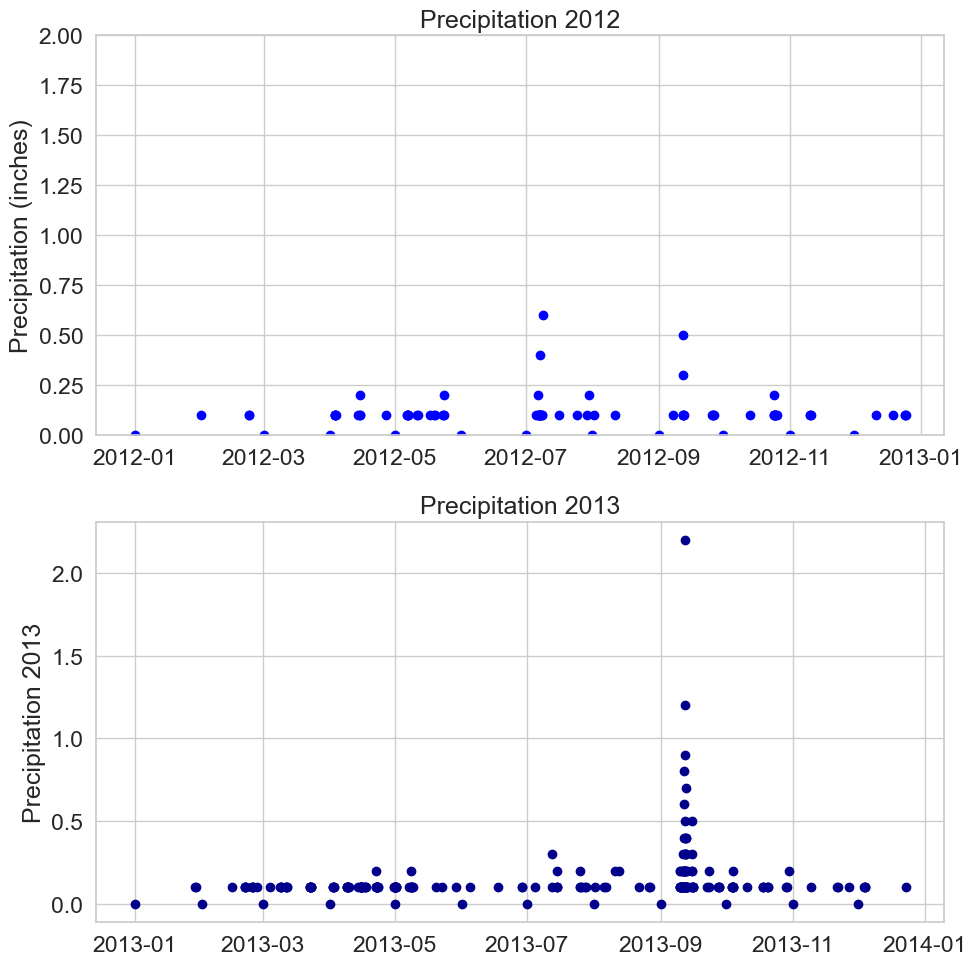

In [79]:
# Plot the scatter for 2012 and 2013 Data
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
ax[0].scatter(x=precip_2012.index.values, y=precip_2012["HPCP"], color="blue")
ax[0].set(title="Precipitation 2012", ylabel="Precipitation (inches)", ylim=[0, 2])
ax[1].scatter(x=precip_2013.index.values, y=precip_2013["HPCP"], color="darkblue")
ax[1].set(title="Precipitation 2013", ylabel="Precipitation 2013")

fig.tight_layout()
fig.show()

## ***Challenge 4: Data Subsets***
Above you subset the data by year and plotted two years in the same figure. You can also create temporal subsets using dates to create subsets that span across specific dates of the year - like this:

`data_frame_name['2005-05-01':'2005-06-31']`

In the cell below create a scatter plot of your precipitation data. Subset the data to the date range September 1, 2013 (2013-09-01) to November 1, 2013 (2013-11-01).

In [108]:
precip_2013.loc["2013-09-01":"2013-11-01"]

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2013-09-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-09-09 17:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-09-09 18:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-09-09 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.2,,
2013-09-09 20:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
...,...,...,...,...,...,...,...,...
2013-10-20 17:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-10-28 15:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-10-29 10:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,


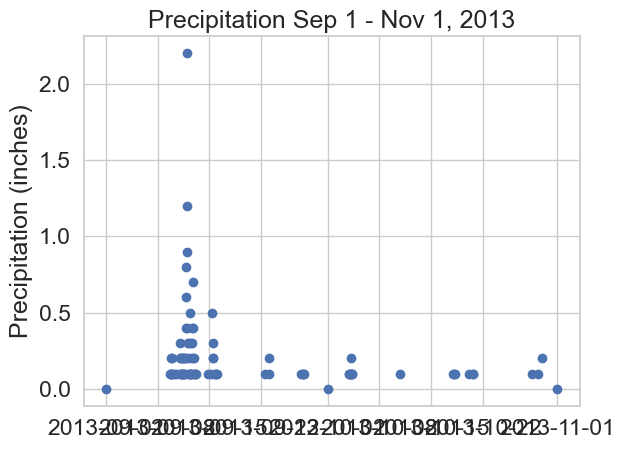

In [113]:
fig, ax = plt.subplots()
ax.scatter(
    x=precip_2013.loc["2013-09-01":"2013-11-01"].index.values,
    y=precip_2013.loc["2013-09-01":"2013-11-01"]["HPCP"],
)
ax.set(title="Precipitation Sep 1 - Nov 1, 2013", ylabel="Precipitation (inches)")
fig.show()

## ***Bonus Challenge: Formatting Dates on the X-Axis***
You may have noticed the dates look a little messy on the x-axis. Remake the plot from above, but use this lesson on customizing the format of time ticks on the x-axis of a plot to adjust the x-axis to be more legible.

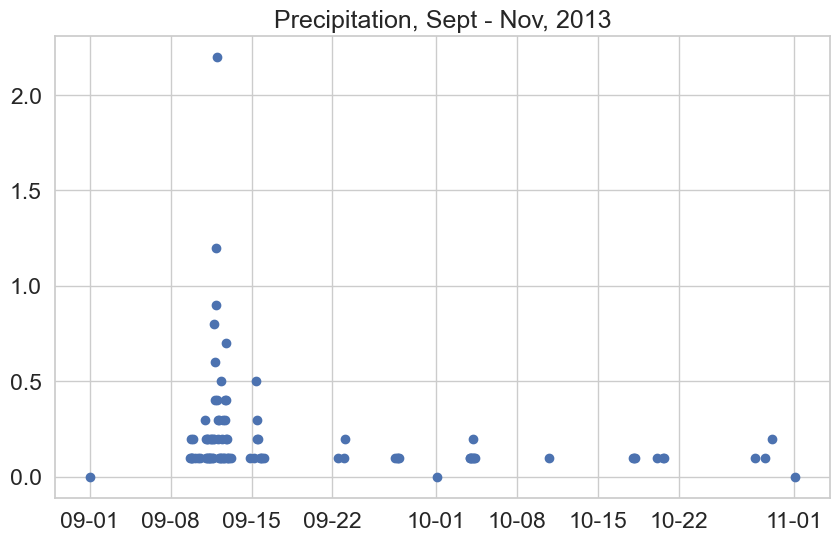

In [115]:
from matplotlib.dates import DateFormatter

# Set the filtered data to a variable
flood_data = boulder_precip_2003_2013.loc["2013-09-01":"2013-11-01"]

# Set the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=flood_data.index.values, y=flood_data["HPCP"])

# Define date format
date_form = DateFormatter(r"%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set(title="Precipitation, Sept - Nov, 2013")
fig.show()